In [141]:
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd

In [142]:
from sklearn.utils import shuffle

train_data = pd.read_csv('mean_variance.csv') # Load training data
test_data = pd.read_csv('test.csv') # Load test data
train_data = shuffle(train_data)
#
print(train_data)
print(test_data)

                   file  r_arm_mean  ...  l_hip_variance  class
60           good_1.mp4   97.287333  ...      454.397812      1
45  20211024_221953.mp4  139.147454  ...        6.166619      1
72        ry_good_9.MOV  112.379130  ...        3.224110      1
70        ry_good_7.MOV  111.185400  ...        6.810981      1
7   20211024_222035.mp4  151.138387  ...       18.054768      0
..                  ...         ...  ...             ...    ...
54         Good PY4.mp4  113.046860  ...       51.872827      1
47  20211024_222126.mp4  218.426504  ...        3.519221      1
3   20211024_221854.mp4  129.460933  ...        3.677057      0
35         ry_bad_8.MOV  217.670000  ...       25.326158      0
41  20211024_221830.mp4  141.049130  ...        3.740447      1

[73 rows x 14 columns]
         file  r_arm_mean  r_arm_variance  ...  l_hip_mean  l_hip_variance  class
0   Bad 2.mov  250.189021     2780.044340  ...  171.971469        5.343149      0
1   Bad 3.mov  140.844607     4423.869271  .

In [143]:
# Split up the data to x and y 

X_train = train_data.drop(['file','class'],1)
print(train_data['class'])
y_train = train_data['class']

X_test = test_data.drop(['file','class'],1)
y_test = test_data['class']



60    1
45    1
72    1
70    1
7     0
     ..
54    1
47    1
3     0
35    0
41    1
Name: class, Length: 73, dtype: int64


In [144]:
# Use normalization 
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train,y_train) #fit X and y training sets

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Define a evaluation metric


In [145]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred), "\n")

  # print out recall and precision
  print(classification_report(y_test, y_pred))

  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
  
  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

### Using Decision trees

[0 0 0 0 0 0 1 0]
AUC is:  0.75 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8

Confusion Matrix: 
 [[6 0]
 [1 1]]


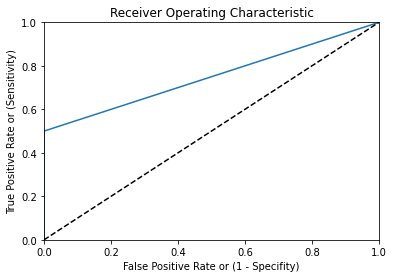

In [146]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1)
# Using default parameters

model.fit(X_train,y_train)

y_pred = model.predict(X_test) # Predicting labels for our test set using model
print (y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

### Using KNN Classifier

[1 0 1 0 1 1 1 0]
AUC is:  0.41666666666666663 

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.20      0.50      0.29         2

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8

Confusion Matrix: 
 [[2 4]
 [1 1]]


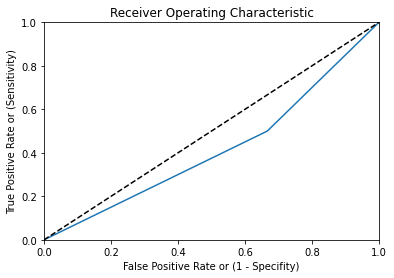

In [147]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20) # Define the model with parameters
model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
print (y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

### Using logistic regression

[1 0 1 1 0 1 1 0]
AUC is:  0.41666666666666663 

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.20      0.50      0.29         2

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8

Confusion Matrix: 
 [[2 4]
 [1 1]]


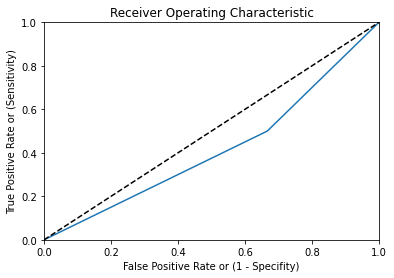

In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, multi_class='auto', solver='liblinear') #(regularization parameter, detect classes auto, optimzation algorithm )
# Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

### Using Gaussian NB

[0 0 0 1 0 0 0 0]
AUC is:  0.4166666666666667 

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         2

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8

Confusion Matrix: 
 [[5 1]
 [2 0]]


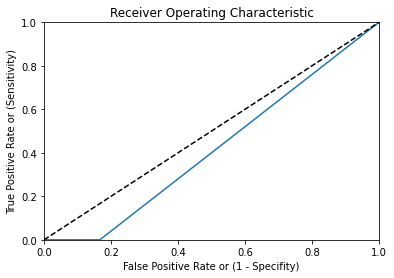

In [149]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

### Using SVM


[1 0 1 1 0 1 1 0]
AUC is:  0.41666666666666663 

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.20      0.50      0.29         2

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8

Confusion Matrix: 
 [[2 4]
 [1 1]]


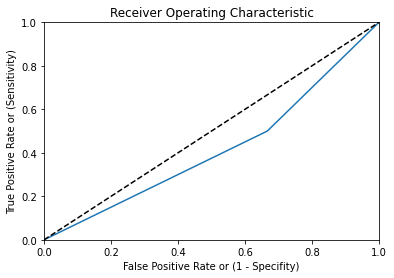

In [150]:
from sklearn.svm import SVC
model = SVC(C=10, gamma='auto', kernel='linear')

model.fit(X_train_norm, y_train) # Training SVM

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best parameter set found on development set:
{'C': 1, 'kernel': 'linear'} 

AUC is:  0.5833333333333333 

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.29      1.00      0.44         2

    accuracy                           0.38         8
   macro avg       0.64      0.58      0.37         8
weighted avg       0.82      0.38      0.33         8

Confusion Matrix: 
 [[1 5]
 [0 2]]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    0.1s finished


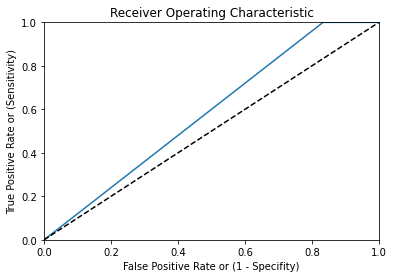

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], #radial basis function
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'],
                     'C': [1, 10, 100]}]

# we define the grid search model for SVM: 
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='roc_auc', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(X_train_norm, y_train)

# Show best parameters: 
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred = clf.predict(X_test_norm) #create predictions
evaluate_on_training_set(y_test, y_pred) # evaluate like we always do

### Using AdaBoostClassifier

[1 0 0 1 0 0 0 0]
AUC is:  0.33333333333333337 

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.33      0.33      0.33         8
weighted avg       0.50      0.50      0.50         8

Confusion Matrix: 
 [[4 2]
 [2 0]]


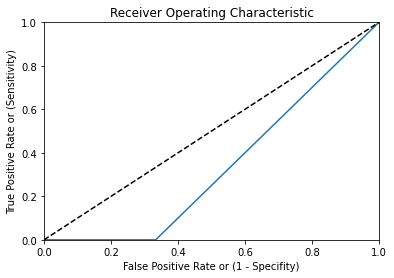

In [152]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=10000, learning_rate=0.01) # Define the model with parameters

model.fit(X_train, y_train) # Training the model
y_pred = model.predict(X_test) # Predicting labels for our test set using trained model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

### Using RandomForestClassifier

AUC is:  0.5833333333333334 

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.33      0.50      0.40         2

    accuracy                           0.62         8
   macro avg       0.57      0.58      0.56         8
weighted avg       0.68      0.62      0.65         8

Confusion Matrix: 
 [[4 2]
 [1 1]]


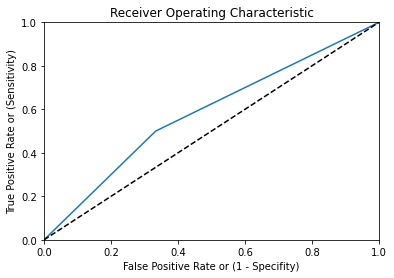

In [153]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50) # Define the model

#TODO fit the model, predict y and evaluate as before
model.fit(X_train_norm,y_train)

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

### Using all

Tune parameters in this part to get best accuracy on classification

In [155]:
# 5. Train and evaluate multiple models (decision tree, svm with grid search, logistic regression, embedded models) to find the best classifier.

from scipy._lib.six import iteritems
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier


tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['liblinear'],
                     'C': [1, 10, 100]}]
model_dict = {
             'Decision Tree' : DecisionTreeClassifier(max_depth=3,min_samples_leaf=1),
              'KNN' :KNeighborsClassifier(n_neighbors = 15),
              'Logistic Regression' : LogisticRegression(C=1.0,multi_class='auto',solver='sag'), #vary solver
              'Naive Bayes Gaussian': GaussianNB(),
              'SVM' : SVC(C=10,gamma='auto',kernel='rbf'), #vary kernel
              'SVM w Grid Search': GridSearchCV(SVC(),tuned_parameters,cv=2,verbose = 1, n_jobs = 4), #Tweak tuned_parameters
              'Ensemble models' : AdaBoostClassifier(n_estimators = 100,learning_rate = 0.1,random_state=0), #vary learning_rate, n_estimators is large enough 
              'Random Forest' : RandomForestClassifier(n_estimators = 50,oob_score = True), #Vary n_estimators
              'MLP Classifier' : MLPClassifier(hidden_layer_sizes = [100]*5,random_state = 1,max_iter = 300), #USING NEURAL NETWORKS, depth 100, width 5
              'Gradient Booster': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0),
              'Stochastic Gradient Descent classifier': SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
        }

score_matrix_dict = {             
              'Decision Tree' : [],
              'KNN' : [],
              'Logistic Regression' :[], 
              'Naive Bayes Gaussian': [], 
              'SVM' : [],
              'SVM w Grid Search': [],
              'Ensemble models' : [],
              'Random Forest' : [],
              'MLP Classifier' : [],
              'Gradient Booster' : [],
              'Stochastic Gradient Descent classifier' : []
}

max_score = 0

# IMPORTANT: Evaluate only in terms of classification_report and confusion matrix. (No need for AUC and ROC here, as we are doing multiclass classification, the target label would need to be binarized first, which we are not doing.)

# run through each model in the list, use X_train_norm
for key,value in model_dict.items():
  model_norm = value #assigning a model to norm values

  model_norm.fit(X_train_norm,y_train)

  y_pred_norm = model_norm.predict(X_test_norm)
  
  score_matrix_dict[key].append(confusion_matrix(y_test,y_pred_norm)) #store the confusion matrix
  score_matrix_dict[key].append(accuracy_score(y_test,y_pred_norm))
  score_matrix_dict[key].append(classification_report(y_test,y_pred_norm))

  print(classification_report(y_test,y_pred_norm))
  # evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function
  
print(score_matrix_dict)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.17      0.50      0.25         2

    accuracy                           0.25         8
   macro avg       0.33      0.33      0.25         8
weighted avg       0.42      0.25      0.25         8

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.20      0.50      0.29         2

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8

              preci

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.33      0.33      0.33         8
weighted avg       0.50      0.50      0.50         8

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.30      0.25      0.27         8
weighted avg       0.45      0.38      0.41         8

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8

              preci

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using cross val

Model checking only, not used for model building

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_auc_score

# Change solver accordingly
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
clf = LogisticRegressionCV(solver='liblinear')

pipeline = Pipeline([('transformer', MinMaxScaler()), ('estimator', clf)])


scores = cross_val_score(pipeline, X_train_norm, y_train, cv=10)
AUCscores = cross_val_score(pipeline, X_train_norm, y_train, cv=10, scoring='roc_auc')


print('The accuracy of each fold: ')
print(scores)

print ('Average accuracy across folds: ' + str(scores.mean()))


print('The AUC of each fold: ')
print(AUCscores)

print ('Average AUC across folds: ' + str(AUCscores.mean()))


print('Final confusion matrix: ')
y_pred = cross_val_predict(pipeline, X_train_norm, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)

print(conf_mat)


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_auc_score


best_model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1)

pipeline = Pipeline([('transformer', MinMaxScaler()), ('estimator', best_model)])


scores = cross_val_score(pipeline, X_train_norm, y_train, cv=10) #10-fold cross val
AUCscores = cross_val_score(pipeline, X_train_norm, y_train, cv=10, scoring='roc_auc')


print('The accuracy of each fold: ')
print(scores)

print ('Average accuracy across folds: ' + str(scores.mean()))


print('The AUC of each fold: ')
print(AUCscores)

print ('Average AUC across folds: ' + str(AUCscores.mean()))


print('Final confusion matrix: ')
y_pred = cross_val_predict(pipeline, X_train_norm, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)

print(conf_mat)